**Importing Library**

In [2]:
import requests
import pandas as pd
import numpy as np
import random
from geopy.geocoders import Nominatim
from IPython.display import Image 
from IPython.core.display import HTML 
from pandas.io.json import json_normalize
import folium
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

**Web Scraping**

In [3]:
req=requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
table_class='wikitable'
req.status_code

200

In [4]:
soup=BeautifulSoup(req.text,'html.parser')
table=soup.find('table',{'class':'wikitable'})

In [5]:
df=pd.read_html(str(table))

**DataFrame Preparation**

In [6]:
df=pd.DataFrame(df[0])

In [7]:
df.head()

0             1                 2
0  Postal Code       Borough     Neighbourhood
1          M1A  Not assigned      Not assigned
2          M2A  Not assigned      Not assigned
3          M3A    North York         Parkwoods
4          M4A    North York  Victoria Village

In [8]:
df.columns=['PostalCode','Borough','Neighbourhood']
df=df.iloc[1:]

In [9]:
df.head()

PostalCode           Borough              Neighbourhood
1        M1A      Not assigned               Not assigned
2        M2A      Not assigned               Not assigned
3        M3A        North York                  Parkwoods
4        M4A        North York           Victoria Village
5        M5A  Downtown Toronto  Regent Park, Harbourfront

In [10]:
df.reset_index(drop=True,inplace=True)

In [11]:
df.head()

PostalCode           Borough              Neighbourhood
0        M1A      Not assigned               Not assigned
1        M2A      Not assigned               Not assigned
2        M3A        North York                  Parkwoods
3        M4A        North York           Victoria Village
4        M5A  Downtown Toronto  Regent Park, Harbourfront

**Removing all the 'Not Assigned' Boroughs**

In [12]:
df['Borough'].replace('Not assigned',np.nan,inplace=True)

In [13]:
df.dropna(subset=['Borough'],inplace=True)

In [14]:
df.reset_index(drop=True,inplace=True)

In [15]:
df.shape

(103, 3)

In [16]:
df.head()

PostalCode           Borough                                Neighbourhood
0        M3A        North York                                    Parkwoods
1        M4A        North York                             Victoria Village
2        M5A  Downtown Toronto                    Regent Park, Harbourfront
3        M6A        North York             Lawrence Manor, Lawrence Heights
4        M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government

**Reading the Geographical Coordinates of all the Postal Codes**

In [17]:
df_geo=pd.read_csv('Geospatial_Coordinates.csv')

In [18]:
df_geo.shape

(103, 3)

In [19]:
df_geo.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [20]:
df_geo.rename(columns={'Postal Code':'PostalCode'},inplace=True)

In [21]:
df_geo.head()

PostalCode   Latitude  Longitude
0        M1B  43.806686 -79.194353
1        M1C  43.784535 -79.160497
2        M1E  43.763573 -79.188711
3        M1G  43.770992 -79.216917
4        M1H  43.773136 -79.239476

**Merging two DataFrames to get the desired output DataFrame**

In [22]:
df_new=pd.merge(df,df_geo,on='PostalCode')

In [23]:
df_new.head()

PostalCode           Borough                                Neighbourhood  \
0        M3A        North York                                    Parkwoods   
1        M4A        North York                             Victoria Village   
2        M5A  Downtown Toronto                    Regent Park, Harbourfront   
3        M6A        North York             Lawrence Manor, Lawrence Heights   
4        M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   

    Latitude  Longitude  
0  43.753259 -79.329656  
1  43.725882 -79.315572  
2  43.654260 -79.360636  
3  43.718518 -79.464763  
4  43.662301 -79.389494

In [24]:
df_new.shape

(103, 5)

**Use geopy library to get the latitude and longitude values of Toronto**

In [25]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent='assignment')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of the City of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of the City of Toronto are 43.6534817, -79.3839347.


**Create a map of Toronto with neighborhoods superimposed on top**

In [26]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, borough, neighborhood in zip(df_new['Latitude'], df_new['Longitude'], df_new['Borough'], df_new['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [27]:
df_new.head(10)

PostalCode           Borough                                Neighbourhood  \
0        M3A        North York                                    Parkwoods   
1        M4A        North York                             Victoria Village   
2        M5A  Downtown Toronto                    Regent Park, Harbourfront   
3        M6A        North York             Lawrence Manor, Lawrence Heights   
4        M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   
5        M9A         Etobicoke      Islington Avenue, Humber Valley Village   
6        M1B       Scarborough                               Malvern, Rouge   
7        M3B        North York                                    Don Mills   
8        M4B         East York              Parkview Hill, Woodbine Gardens   
9        M5B  Downtown Toronto                     Garden District, Ryerson   

    Latitude  Longitude  
0  43.753259 -79.329656  
1  43.725882 -79.315572  
2  43.654260 -79.360636  
3  43.718518 -79.464763  
4  43.662301 -79.389494  
5  43.667856 -79.532242  
6  43.806686 -79.194353  
7  43.745906 -79.352188  
8  43.706397 -79.309937  
9  43.657162 -79.378937

**Foursquare Credentials and Version**

In [28]:
CLIENT_ID = 'JGGBRN5XODTLZGJOMCSWIQMRH1JLGJKPSFR10XNB2R5U25GR' # your Foursquare ID
CLIENT_SECRET = 'KWRAMLK2HOJBQ2XLICLKXRU3M4HOCC1U2VG4Y4OPP5JF03QX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JGGBRN5XODTLZGJOMCSWIQMRH1JLGJKPSFR10XNB2R5U25GR
CLIENT_SECRET:KWRAMLK2HOJBQ2XLICLKXRU3M4HOCC1U2VG4Y4OPP5JF03QX


**Selecting all the Neighborhoods of Toronto**

In [29]:
df_tor=df_new[df_new['Borough'].str.contains('Toronto')].reset_index(drop=True)

In [30]:
df_tor.head()

PostalCode           Borough                                Neighbourhood  \
0        M5A  Downtown Toronto                    Regent Park, Harbourfront   
1        M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   
2        M5B  Downtown Toronto                     Garden District, Ryerson   
3        M5C  Downtown Toronto                               St. James Town   
4        M4E      East Toronto                                  The Beaches   

    Latitude  Longitude  
0  43.654260 -79.360636  
1  43.662301 -79.389494  
2  43.657162 -79.378937  
3  43.651494 -79.375418  
4  43.676357 -79.293031

In [31]:
df_tor.shape

(40, 5)

In [32]:
df_count=df_tor.groupby('Borough')['Neighbourhood'].count()

In [33]:
df_count

Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
Toronto/York         1
West Toronto         6
Name: Neighbourhood, dtype: int64

In [34]:
lat=df_tor['Latitude'][0]
lon=df_tor['Longitude'][0]

**Ploting a Bar graph to get the total neighbourhood number for each borough**

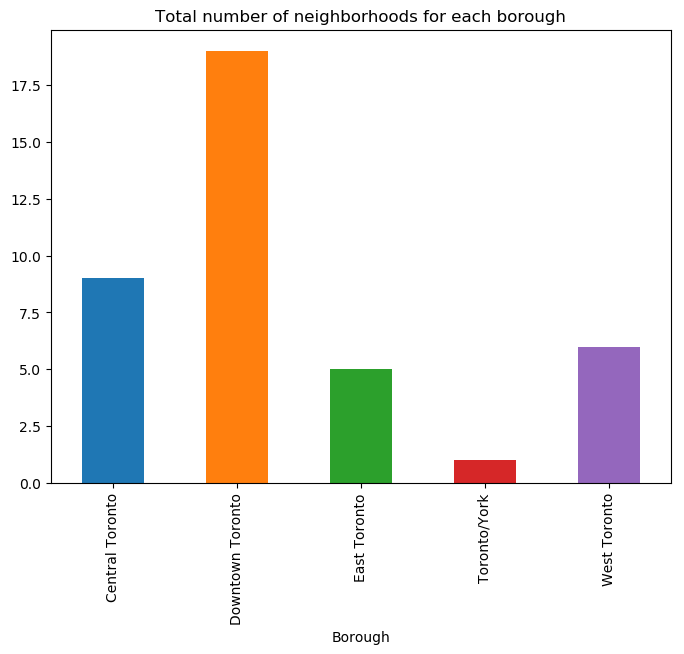

In [86]:
plt.figure(figsize=(8,6),dpi=100)
df_count.plot(kind='bar')
plt.title('Total number of neighborhoods for each borough')
plt.show()

**From the above diagram it is clear that Downtown Toronto has highest number of neighbourhoods**

In [36]:
def get_venues(lat,lng):
    
    #set variables
    radius=1500
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    print(results["response"])
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [37]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)
for row in df_tor.values.tolist():
    PostalCode,Borough, Neighborhood, Latitude, Longitude=row
    venues= get_venues(Latitude,Longitude)
    print(venues)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_ny = indian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)


{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Corktown', 'headerFullLocation': 'Corktown, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 176, 'suggestedBounds': {'ne': {'lat': 43.667759913500014, 'lng': -79.34201190044578}, 'sw': {'lat': 43.640759886499985, 'lng': -79.37925989955423}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '54ea41ad498e9a11e9e13308', 'name': 'Roselle Desserts', 'location': {'address': '362 King St E', 'crossStreet': 'Trinity St', 'lat': 43.653446723052674, 'lng': -79.3620167174383, 'labeledLatLngs': [{'label': 'display', 'lat': 43.653446723052674, 'lng': -79.3620167174383}], 'distance': 143, 'postalCode': 'M5A 1K9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'forma

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Bay Street Corridor', 'headerFullLocation': 'Bay Street Corridor, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 230, 'suggestedBounds': {'ne': {'lat': 43.67580151350001, 'lng': -79.37086730599856}, 'sw': {'lat': 43.648801486499984, 'lng': -79.40812029400144}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b9d206bf964a520e69136e3', 'name': "Queen's Park", 'location': {'address': 'University Ave.', 'crossStreet': 'at Wellesley Ave.', 'lat': 43.66394609897775, 'lng': -79.39217952520835, 'labeledLatLngs': [{'label': 'display', 'lat': 43.66394609897775, 'lng': -79.39217952520835}], 'distance': 283, 'postalCode': 'M5R 2E8', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', '

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Downtown Toronto', 'headerFullLocation': 'Downtown Toronto, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 234, 'suggestedBounds': {'ne': {'lat': 43.67066181350001, 'lng': -79.36031220041635}, 'sw': {'lat': 43.64366178649998, 'lng': -79.39756199958363}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '57eda381498ebe0e6ef40972', 'name': 'UNIQLO ユニクロ', 'location': {'address': '220 Yonge St', 'crossStreet': 'at Dundas St W', 'lat': 43.65591027779457, 'lng': -79.38064099181345, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65591027779457, 'lng': -79.38064099181345}], 'distance': 195, 'postalCode': 'M5B 2H1', 'cc': 'CA', 'neighborhood': 'Downtown Toronto', 'city': 'Toro

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'St. Lawrence', 'headerFullLocation': 'St. Lawrence, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 237, 'suggestedBounds': {'ne': {'lat': 43.66499391350001, 'lng': -79.35679475820014}, 'sw': {'lat': 43.637993886499984, 'lng': -79.39404104179987}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4fff1f96e4b042ae8acddca5', 'name': 'Fahrenheit Coffee', 'location': {'address': '120 Lombard St', 'crossStreet': 'at Jarvis St', 'lat': 43.65238358726612, 'lng': -79.37271903848271, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65238358726612, 'lng': -79.37271903848271}], 'distance': 238, 'postalCode': 'M5C 3H5', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Cana

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'The Beaches', 'headerFullLocation': 'The Beaches, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 118, 'suggestedBounds': {'ne': {'lat': 43.68985741350001, 'lng': -79.27440034347157}, 'sw': {'lat': 43.66285738649998, 'lng': -79.31166205652843}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bd461bc77b29c74a07d9282', 'name': 'Glen Manor Ravine', 'location': {'address': 'Glen Manor', 'crossStreet': 'Queen St.', 'lat': 43.67682094413784, 'lng': -79.29394208780985, 'labeledLatLngs': [{'label': 'display', 'lat': 43.67682094413784, 'lng': -79.29394208780985}], 'distance': 89, 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['Glen Mano

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Downtown Toronto', 'headerFullLocation': 'Downtown Toronto, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 191, 'suggestedBounds': {'ne': {'lat': 43.65827081350001, 'lng': -79.3546853425663}, 'sw': {'lat': 43.63127078649998, 'lng': -79.39192745743371}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b56a44ff964a5206e1728e3', 'name': 'The Keg Steakhouse + Bar - Esplanade', 'location': {'address': '26 The Esplanade', 'lat': 43.64671207408793, 'lng': -79.37476761639118, 'labeledLatLngs': [{'label': 'display', 'lat': 43.64671207408793, 'lng': -79.37476761639118}], 'distance': 246, 'postalCode': 'M5E 1A7', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada',

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Bay Street Corridor', 'headerFullLocation': 'Bay Street Corridor, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 234, 'suggestedBounds': {'ne': {'lat': 43.67145241350001, 'lng': -79.36875745518701}, 'sw': {'lat': 43.644452386499985, 'lng': -79.40600774481298}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5a81ae339deb7d369fa7f146', 'name': 'Hailed Coffee', 'location': {'address': '44 Gerrard St W', 'crossStreet': 'Yonge St', 'lat': 43.65883296982352, 'lng': -79.38368351986598, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65883296982352, 'lng': -79.38368351986598}], 'distance': 313, 'postalCode': 'M5G', 'cc': 'CA', 'neighborhood': 'College Park', 'city': 'Toront

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Christie Pits', 'headerFullLocation': 'Christie Pits, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 134, 'suggestedBounds': {'ne': {'lat': 43.683042013500014, 'lng': -79.40393495916115}, 'sw': {'lat': 43.656041986499986, 'lng': -79.44119244083885}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4adcfd7cf964a5203e6321e3', 'name': 'Fiesta Farms', 'location': {'address': '200 Christie St', 'crossStreet': 'at Essex St', 'lat': 43.66847077052224, 'lng': -79.42048512748114, 'labeledLatLngs': [{'label': 'display', 'lat': 43.66847077052224, 'lng': -79.42048512748114}], 'distance': 205, 'postalCode': 'M6G 3B6', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Financial District', 'headerFullLocation': 'Financial District, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 219, 'suggestedBounds': {'ne': {'lat': 43.66407121350002, 'lng': -79.3659446443081}, 'sw': {'lat': 43.637071186499995, 'lng': -79.4031903556919}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ad4c05ef964a520a6f620e3', 'name': 'Nathan Phillips Square', 'location': {'address': '100 Queen St W', 'crossStreet': 'at Bay St', 'lat': 43.65227047322295, 'lng': -79.38351631164551, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65227047322295, 'lng': -79.38351631164551}], 'distance': 207, 'postalCode': 'M5H 2N1', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'cou

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Davenport', 'headerFullLocation': 'Davenport, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 147, 'suggestedBounds': {'ne': {'lat': 43.68250511350002, 'lng': -79.42363072579822}, 'sw': {'lat': 43.65550508649999, 'lng': -79.46088787420179}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5753753b498eeb535c53aed5', 'name': 'The Greater Good Bar', 'location': {'address': '229 Geary St', 'crossStreet': 'at Dufferin St', 'lat': 43.669409, 'lng': -79.439267, 'labeledLatLngs': [{'label': 'display', 'lat': 43.669409, 'lng': -79.439267}], 'distance': 245, 'postalCode': 'M6H 2C1', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['229 Geary

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Harbourfront', 'headerFullLocation': 'Harbourfront, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 241, 'suggestedBounds': {'ne': {'lat': 43.65431571350001, 'lng': -79.36313246843027}, 'sw': {'lat': 43.62731568649998, 'lng': -79.40037213156971}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b642db1f964a520b7a22ae3', 'name': 'Roundhouse Park', 'location': {'address': '255 Bremner Blvd.', 'crossStreet': 'at Lower Simcoe St.', 'lat': 43.64174513889102, 'lng': -79.38427882922346, 'labeledLatLngs': [{'label': 'display', 'lat': 43.64174513889102, 'lng': -79.38427882922346}], 'distance': 228, 'postalCode': 'M5V 3M9', 'cc': 'CA', 'neighborhood': 'Entertainment District', '

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Trinity Bellwoods', 'headerFullLocation': 'Trinity Bellwoods, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 227, 'suggestedBounds': {'ne': {'lat': 43.66142671350002, 'lng': -79.40112766423103}, 'sw': {'lat': 43.63442668649999, 'lng': -79.43837173576897}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4f7891c7e4b0b9643b73e08d', 'name': 'Bellwoods Brewery', 'location': {'address': '124 Ossington Ave', 'crossStreet': 'at Argyle St', 'lat': 43.647097254598236, 'lng': -79.41995537873463, 'labeledLatLngs': [{'label': 'display', 'lat': 43.647097254598236, 'lng': -79.41995537873463}], 'distance': 93, 'postalCode': 'M6J 2Z5', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'co

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Greektown', 'headerFullLocation': 'Greektown, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 95, 'suggestedBounds': {'ne': {'lat': 43.69305711350001, 'lng': -79.33355614993903}, 'sw': {'lat': 43.66605708649998, 'lng': -79.37081985006097}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4e3dbb5e45dd68e3273e03b7', 'name': 'Cafe Fiorentina', 'location': {'address': '463 Danforth Ave', 'crossStreet': 'Logan Ave', 'lat': 43.677743, 'lng': -79.350115, 'labeledLatLngs': [{'label': 'display', 'lat': 43.677743, 'lng': -79.350115}], 'distance': 261, 'postalCode': 'M4K 1P1', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['463 Danforth Ave

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Financial District', 'headerFullLocation': 'Financial District, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 183, 'suggestedBounds': {'ne': {'lat': 43.66067681350001, 'lng': -79.36295459671597}, 'sw': {'lat': 43.63367678649998, 'lng': -79.40019820328406}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ad4c05df964a52059f620e3', 'name': 'Canoe', 'location': {'address': '66 Wellington St West', 'crossStreet': 'at Bay Street', 'lat': 43.647452066183476, 'lng': -79.38132001815676, 'labeledLatLngs': [{'label': 'display', 'lat': 43.647452066183476, 'lng': -79.38132001815676}], 'distance': 36, 'postalCode': 'M5K 1H6', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Parkdale', 'headerFullLocation': 'Parkdale, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 149, 'suggestedBounds': {'ne': {'lat': 43.65034721350001, 'lng': -79.40957279819615}, 'sw': {'lat': 43.623347186499984, 'lng': -79.44681000180388}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4f54ef6ce4b0929810978bb6', 'name': 'Reebok Crossfit Liberty Village', 'location': {'address': 'Liberty Village', 'lat': 43.637035591932005, 'lng': -79.42480199455974, 'labeledLatLngs': [{'label': 'display', 'lat': 43.637035591932005, 'lng': -79.42480199455974}], 'distance': 273, 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['Liberty Village', 'T

{'headerLocation': 'East End', 'headerFullLocation': 'East End, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 112, 'suggestedBounds': {'ne': {'lat': 43.682498513500015, 'lng': -79.2969430278466}, 'sw': {'lat': 43.65549848649999, 'lng': -79.33420017215337}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ade390ff964a5200e7421e3', 'name': 'System Fitness', 'location': {'address': '1661 Queen St East', 'crossStreet': 'at Kingston Rd', 'lat': 43.667171452103204, 'lng': -79.31273345707406, 'labeledLatLngs': [{'label': 'display', 'lat': 43.667171452103204, 'lng': -79.31273345707406}], 'distance': 305, 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1661 Queen St East (at Kingston Rd)', 'Toronto ON', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d1

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Financial District', 'headerFullLocation': 'Financial District, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 187, 'suggestedBounds': {'ne': {'lat': 43.66169851350001, 'lng': -79.36119477996505}, 'sw': {'lat': 43.634698486499985, 'lng': -79.39843902003497}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ad4c05df964a52059f620e3', 'name': 'Canoe', 'location': {'address': '66 Wellington St West', 'crossStreet': 'at Bay Street', 'lat': 43.647452066183476, 'lng': -79.38132001815676, 'labeledLatLngs': [{'label': 'display', 'lat': 43.647452066183476, 'lng': -79.38132001815676}], 'distance': 146, 'postalCode': 'M5K 1H6', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'count

{'headerLocation': 'Leslieville', 'headerFullLocation': 'Leslieville, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 114, 'suggestedBounds': {'ne': {'lat': 43.673025513500015, 'lng': -79.32229736721104}, 'sw': {'lat': 43.64602548649999, 'lng': -79.35954863278897}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ad7e958f964a520001021e3', 'name': "Ed's Real Scoop", 'location': {'address': '920 Queen St. E', 'crossStreet': 'btwn Logan Ave. & Morse St.', 'lat': 43.660655832455014, 'lng': -79.3420187548006, 'labeledLatLngs': [{'label': 'display', 'lat': 43.660655832455014, 'lng': -79.3420187548006}], 'distance': 153, 'postalCode': 'M4M 1J5', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['920 Queen St. E (btwn Logan Ave. & Morse St.)', 'Toronto ON M4

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Toronto', 'headerFullLocation': 'Toronto', 'headerLocationGranularity': 'city', 'totalResults': 69, 'suggestedBounds': {'ne': {'lat': 43.741520513500014, 'lng': -79.37014318158191}, 'sw': {'lat': 43.714520486499985, 'lng': -79.40743701841808}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '50e6da19e4b0d8a78a0e9794', 'name': 'Lawrence Park Ravine', 'location': {'address': '3055 Yonge Street', 'crossStreet': 'Lawrence Avenue East', 'lat': 43.72696303913755, 'lng': -79.39438246708775, 'labeledLatLngs': [{'label': 'display', 'lat': 43.72696303913755, 'lng': -79.39438246708775}], 'distance': 465, 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['3055 Yonge 

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Lawrence Park South', 'headerFullLocation': 'Lawrence Park South, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 93, 'suggestedBounds': {'ne': {'lat': 43.72519481350001, 'lng': -79.39829376181928}, 'sw': {'lat': 43.69819478649998, 'lng': -79.4355774381807}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4fdc0e98e4b05197cd14912b', 'name': 'The Abbot', 'location': {'address': '508 Eglinton Ave W', 'crossStreet': 'Heddington Ave', 'lat': 43.703687730512435, 'lng': -79.41348481516249, 'labeledLatLngs': [{'label': 'display', 'lat': 43.703687730512435, 'lng': -79.41348481516249}], 'distance': 933, 'postalCode': 'M5N 1A5', 'cc': 'CA', 'neighborhood': 'Allenby, Toronto, ON',

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Toronto', 'headerFullLocation': 'Toronto', 'headerLocationGranularity': 'city', 'totalResults': 78, 'suggestedBounds': {'ne': {'lat': 43.68668531350001, 'lng': -79.46863202827215}, 'sw': {'lat': 43.65968528649998, 'lng': -79.50589177172786}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '55569b59498ec5aeca07911e', 'name': 'Rainhard Brewing', 'location': {'address': '100 Symes Rd', 'lat': 43.67269006118166, 'lng': -79.47867903828485, 'labeledLatLngs': [{'label': 'display', 'lat': 43.67269006118166, 'lng': -79.47867903828485}], 'distance': 693, 'postalCode': 'M6N 3T1', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['100 Symes Rd', 'Toronto ON M6N 3T1',

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Davisville', 'headerFullLocation': 'Davisville, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 97, 'suggestedBounds': {'ne': {'lat': 43.72625111350001, 'lng': -79.371555333249}, 'sw': {'lat': 43.699251086499984, 'lng': -79.40883966675099}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ba011c2f964a5204a5737e3', 'name': 'Sherwood Park', 'location': {'address': '190 Sherwood Ave', 'lat': 43.71655100307589, 'lng': -79.38777567141624, 'labeledLatLngs': [{'label': 'display', 'lat': 43.71655100307589, 'lng': -79.38777567141624}], 'distance': 465, 'postalCode': 'M4P 2A8', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['190 Sherwood 

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Forest Hill South', 'headerFullLocation': 'Forest Hill South, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 101, 'suggestedBounds': {'ne': {'lat': 43.710447613500016, 'lng': -79.39266994717899}, 'sw': {'lat': 43.68344758649999, 'lng': -79.42994445282103}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4fdc0e98e4b05197cd14912b', 'name': 'The Abbot', 'location': {'address': '508 Eglinton Ave W', 'crossStreet': 'Heddington Ave', 'lat': 43.703687730512435, 'lng': -79.41348481516249, 'labeledLatLngs': [{'label': 'display', 'lat': 43.703687730512435, 'lng': -79.41348481516249}], 'distance': 770, 'postalCode': 'M5N 1A5', 'cc': 'CA', 'neighborhood': 'Allenby, Toronto, ON', 

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'High Park', 'headerFullLocation': 'High Park, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 126, 'suggestedBounds': {'ne': {'lat': 43.67510831350001, 'lng': -79.44613702106503}, 'sw': {'lat': 43.64810828649998, 'lng': -79.48338957893495}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '506f3aa3e4b0b0ed3e1dc405', 'name': 'Indie Alehouse', 'location': {'address': '2876 Dundas St W', 'crossStreet': 'at Keele St', 'lat': 43.66547472315272, 'lng': -79.46528973047275, 'labeledLatLngs': [{'label': 'display', 'lat': 43.66547472315272, 'lng': -79.46528973047275}], 'distance': 432, 'postalCode': 'M6P 1Y9', 'cc': 'CA', 'neighborhood': 'The Junction', 'city': 'Toronto', 'state':

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Lawrence Park South', 'headerFullLocation': 'Lawrence Park South, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 123, 'suggestedBounds': {'ne': {'lat': 43.728883413500014, 'lng': -79.38703541437381}, 'sw': {'lat': 43.701883386499986, 'lng': -79.42432138562621}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4f4d31aee4b0ef284ae397ea', 'name': 'Himalayan Java', 'location': {'address': '2552 Yonge St', 'crossStreet': 'Briar Hill', 'lat': 43.713486181375714, 'lng': -79.39981137215881, 'labeledLatLngs': [{'label': 'display', 'lat': 43.713486181375714, 'lng': -79.39981137215881}], 'distance': 517, 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formatte

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'The Annex', 'headerFullLocation': 'The Annex, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 110, 'suggestedBounds': {'ne': {'lat': 43.68620971350001, 'lng': -79.3870486759116}, 'sw': {'lat': 43.659209686499985, 'lng': -79.42430812408843}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ae7bc29f964a52084ad21e3', 'name': "Ezra's Pound", 'location': {'address': '238 Dupont St', 'crossStreet': 'Spadina Ave', 'lat': 43.67515283323029, 'lng': -79.40585846415303, 'labeledLatLngs': [{'label': 'display', 'lat': 43.67515283323029, 'lng': -79.40585846415303}], 'distance': 272, 'postalCode': 'M5R 1V7', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formatte

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'High Park', 'headerFullLocation': 'High Park, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 102, 'suggestedBounds': {'ne': {'lat': 43.66245971350001, 'lng': -79.43770264396437}, 'sw': {'lat': 43.635459686499985, 'lng': -79.47494735603564}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b757192f964a520d30c2ee3', 'name': 'Offleash Dog Trail - High Park', 'location': {'address': 'Centre Rd', 'crossStreet': 'btw High Park Blvd & Bloor', 'lat': 43.64548543069719, 'lng': -79.45874691009521, 'labeledLatLngs': [{'label': 'display', 'lat': 43.64548543069719, 'lng': -79.45874691009521}], 'distance': 433, 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'for

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Davisville', 'headerFullLocation': 'Davisville, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 112, 'suggestedBounds': {'ne': {'lat': 43.71782441350001, 'lng': -79.3701505539405}, 'sw': {'lat': 43.69082438649998, 'lng': -79.40742964605948}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ae6ea6ef964a52082a721e3', 'name': 'Jules Cafe Patisserie', 'location': {'address': '617 Mt Pleasant Ave', 'crossStreet': 'at Manor Rd E', 'lat': 43.70413799694304, 'lng': -79.38841260442167, 'labeledLatLngs': [{'label': 'display', 'lat': 43.70413799694304, 'lng': -79.38841260442167}], 'distance': 36, 'postalCode': 'M4S 2M5', 'cc': 'CA', 'neighborhood': 'Davisville', 'city': 'Toronto'

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'University of Toronto', 'headerFullLocation': 'University of Toronto, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 235, 'suggestedBounds': {'ne': {'lat': 43.67619561350001, 'lng': -79.38142268372494}, 'sw': {'lat': 43.649195586499985, 'lng': -79.41867591627508}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '527d450111d25050de4ea0d8', 'name': 'Rasa', 'location': {'address': '196 Robert Street', 'lat': 43.662756751275445, 'lng': -79.40398803188654, 'labeledLatLngs': [{'label': 'display', 'lat': 43.662756751275445, 'lng': -79.40398803188654}], 'distance': 317, 'postalCode': 'M5S 2K8', 'cc': 'CA', 'neighborhood': 'Downtown Toronto', 'city': 'Toronto', 'state': 'ON', '

{'headerLocation': 'Bloor West Village', 'headerFullLocation': 'Bloor West Village, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 53, 'suggestedBounds': {'ne': {'lat': 43.66507061350001, 'lng': -79.46582673441662}, 'sw': {'lat': 43.638070586499985, 'lng': -79.50307306558338}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b91740af964a520adbd33e3', 'name': 'Coffee Tree Roastery', 'location': {'address': '2412 Bloor Street West', 'lat': 43.64964735112305, 'lng': -79.48343639040918, 'labeledLatLngs': [{'label': 'display', 'lat': 43.64964735112305, 'lng': -79.48343639040918}], 'distance': 229, 'postalCode': 'M6S 1P9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['2412 Bloor Street West', 'Toronto ON M6S 1P9', 'Canada']}, 'categories': [{'id': '4

{'headerLocation': 'Moore Park', 'headerFullLocation': 'Moore Park, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 79, 'suggestedBounds': {'ne': {'lat': 43.70307431350001, 'lng': -79.36452493845695}, 'sw': {'lat': 43.67607428649998, 'lng': -79.40179486154307}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4adcb343f964a520e32e21e3', 'name': 'Summerhill Market', 'location': {'address': '446 Summerhill Ave', 'crossStreet': 'btwn. MacLennan Ave. and Glen Rd.', 'lat': 43.68626482142425, 'lng': -79.37545823237794, 'labeledLatLngs': [{'label': 'display', 'lat': 43.68626482142425, 'lng': -79.37545823237794}], 'distance': 721, 'postalCode': 'M4W 2E4', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['446 Summerhill Ave (btwn. MacLennan Ave. and Glen Rd.)'

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Kensington', 'headerFullLocation': 'Kensington, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 223, 'suggestedBounds': {'ne': {'lat': 43.666705713500015, 'lng': -79.3814256273744}, 'sw': {'lat': 43.63970568649999, 'lng': -79.41867297262561}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '50427a03e4b08d9f5931f593', 'name': 'Seven Lives - Tacos y Mariscos', 'location': {'address': '69 Kensington Ave', 'crossStreet': 'Baldwin St', 'lat': 43.65441817160925, 'lng': -79.40054467846261, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65441817160925, 'lng': -79.40054467846261}], 'distance': 140, 'postalCode': 'M5T 2L6', 'cc': 'CA', 'neighborhood': 'Kensington Market', 'cit

{'headerLocation': 'Deer Park', 'headerFullLocation': 'Deer Park, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 114, 'suggestedBounds': {'ne': {'lat': 43.69991231350001, 'lng': -79.38141532079203}, 'sw': {'lat': 43.67291228649998, 'lng': -79.41868327920798}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5a67afb973fe2528841f60f3', 'name': 'The Market By Longo’s', 'location': {'address': '111 St Clair Ave W', 'lat': 43.686711, 'lng': -79.399536, 'labeledLatLngs': [{'label': 'display', 'lat': 43.686711, 'lng': -79.399536}], 'distance': 53, 'postalCode': 'M4V 1N5', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['111 St Clair Ave W', 'Toronto ON M4V 1N5', 'Canada']}, 'categories': [{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'Supermarket', 'pluralNa

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Toronto', 'headerFullLocation': 'Toronto', 'headerLocationGranularity': 'city', 'totalResults': 68, 'suggestedBounds': {'ne': {'lat': 43.642446713500014, 'lng': -79.3758037456678}, 'sw': {'lat': 43.615446686499986, 'lng': -79.41303605433221}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b107f6cf964a520c07123e3', 'name': 'The National Yacht Club', 'location': {'address': '1 Stadium Road', 'crossStreet': 'Queens Quay', 'lat': 43.63175446630469, 'lng': -79.4021854808, 'labeledLatLngs': [{'label': 'display', 'lat': 43.63175446630469, 'lng': -79.4021854808}], 'distance': 699, 'postalCode': 'M6S 3G7', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1 St

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Rosedale', 'headerFullLocation': 'Rosedale, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 149, 'suggestedBounds': {'ne': {'lat': 43.69306261350001, 'lng': -79.35889754823111}, 'sw': {'lat': 43.66606258649998, 'lng': -79.39616125176892}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4adcb343f964a520e32e21e3', 'name': 'Summerhill Market', 'location': {'address': '446 Summerhill Ave', 'crossStreet': 'btwn. MacLennan Ave. and Glen Rd.', 'lat': 43.68626482142425, 'lng': -79.37545823237794, 'labeledLatLngs': [{'label': 'display', 'lat': 43.68626482142425, 'lng': -79.37545823237794}], 'distance': 764, 'postalCode': 'M4W 2E4', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'St. Lawrence', 'headerFullLocation': 'St. Lawrence, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 215, 'suggestedBounds': {'ne': {'lat': 43.65993521350001, 'lng': -79.35622442661884}, 'sw': {'lat': 43.632935186499985, 'lng': -79.39346757338114}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ad4c05ef964a520d8f620e3', 'name': 'Hockey Hall Of Fame (Hockey Hall of Fame)', 'location': {'address': '30 Yonge St.', 'crossStreet': 'at Brookfield Pl.', 'lat': 43.646974451431056, 'lng': -79.37732323942681, 'labeledLatLngs': [{'label': 'display', 'lat': 43.646974451431056, 'lng': -79.37732323942681}], 'distance': 208, 'postalCode': 'M5E 1X8', 'cc': 'CA', 'city': 'Toronto', 's

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Cabbagetown', 'headerFullLocation': 'Cabbagetown, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 156, 'suggestedBounds': {'ne': {'lat': 43.68146701350001, 'lng': -79.34904704797908}, 'sw': {'lat': 43.65446698649998, 'lng': -79.38630355202092}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b646a6ff964a5205cb12ae3', 'name': 'Cranberries', 'location': {'address': '601 Parliament St.', 'crossStreet': 'at Wellesley St. E', 'lat': 43.6678427705951, 'lng': -79.36940687874281, 'labeledLatLngs': [{'label': 'display', 'lat': 43.6678427705951, 'lng': -79.36940687874281}], 'distance': 140, 'postalCode': 'M4X 1P9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canad

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Financial District', 'headerFullLocation': 'Financial District, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 188, 'suggestedBounds': {'ne': {'lat': 43.66192921350002, 'lng': -79.36365800844032}, 'sw': {'lat': 43.63492918649999, 'lng': -79.40090239155967}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ad4c05df964a52059f620e3', 'name': 'Canoe', 'location': {'address': '66 Wellington St West', 'crossStreet': 'at Bay Street', 'lat': 43.647452066183476, 'lng': -79.38132001815676, 'labeledLatLngs': [{'label': 'display', 'lat': 43.647452066183476, 'lng': -79.38132001815676}], 'distance': 133, 'postalCode': 'M5K 1H6', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'countr

{'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'The Village', 'headerFullLocation': 'The Village, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 141, 'suggestedBounds': {'ne': {'lat': 43.679359913500015, 'lng': -79.36453230187776}, 'sw': {'lat': 43.65235988649999, 'lng': -79.40178749812226}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '51a11515498ef97667980b8c', 'name': 'DanceLifeX Centre', 'location': {'address': '619 Yonge Street', 'crossStreet': 'btwn Isabella St & Gloucester St', 'lat': 43.66695583448771, 'lng': -79.3852972984314, 'labeledLatLngs': [{'label': 'display', 'lat': 43.66695583448771, 'lng': -79.3852972984314}], 'distance': 210, 'postalCode': 'M4Y 1Z5', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON'

{'headerLocation': 'Leslieville', 'headerFullLocation': 'Leslieville, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 112, 'suggestedBounds': {'ne': {'lat': 43.676243913500016, 'lng': -79.30293136873918}, 'sw': {'lat': 43.64924388649999, 'lng': -79.34018463126081}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '58d4650e2f91cb5ccec03447', 'name': 'Rorschach Brewing Co.', 'location': {'address': '1001 Eastern Ave', 'crossStreet': 'Woodfield Rd', 'lat': 43.6634831695922, 'lng': -79.31982368639481, 'labeledLatLngs': [{'label': 'display', 'lat': 43.6634831695922, 'lng': -79.31982368639481}], 'distance': 162, 'postalCode': 'M4L 1A8', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1001 Eastern Ave (Woodfield Rd)', 'Toronto ON M4L 1A8', 'Canada']}, 'cat

In [38]:
indian_rest_ny.head()

Borough                                  Neighborhood  \
0      East Toronto                                   The Beaches   
1  Downtown Toronto                                      Christie   
2  Downtown Toronto                                      Christie   
3  Downtown Toronto                                      Christie   
4      West Toronto  Brockton, Parkdale Village, Exhibition Place   

                         ID                    Name  
0  4dcd7c6352b1f8915b7e7f7e            Delhi Bistro  
1  4adb969ef964a520332921e3  Banjara Indian Cuisine  
2  4c62c59ce1621b8dd0332453   Roti Cuisine of India  
3  52418b0b7e48222eea81d2d2        Pukka Restaurant  
4  4aecbbb0f964a520bcca21e3            Mother India

In [39]:
indian_rest_ny.shape

(33, 4)

**So there are 33 Indian Restaurants in the Toronto city within a area of radius 1.5 KM**

Text(0.5,1,'Count of Indian Restaurant at each borough location')

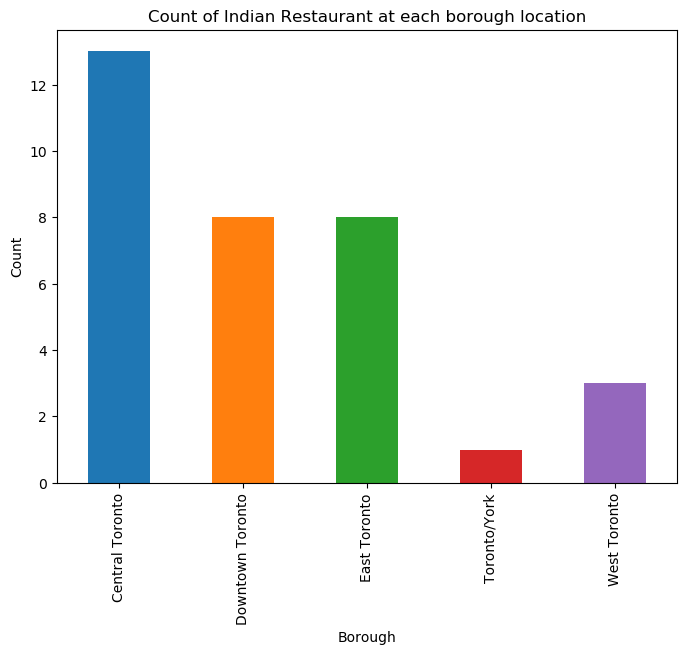

In [40]:
plt.figure(figsize=(8,6),dpi=100)
indian_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.title('Count of Indian Restaurant at each borough location')

In [41]:
indian_rest_ny.groupby('Neighborhood')['ID'].count()

Neighborhood
Brockton, Parkdale Village, Exhibition Place                                            2
Business reply mail Processing Centre, South Central Letter Processing Plant Toronto    3
Christie                                                                                3
Davisville                                                                              4
Davisville North                                                                        3
Forest Hill North & West, Forest Hill Road Park                                         1
High Park, The Junction South                                                           1
India Bazaar, The Beaches West                                                          4
Moore Park, Summerhill East                                                             1
Rosedale                                                                                3
Runnymede, The Junction, Weston-Pellam Park, Carlton Village                           

Text(0.5,1,'Number of Indian Restaurants in each neighborhoods of Toronto')

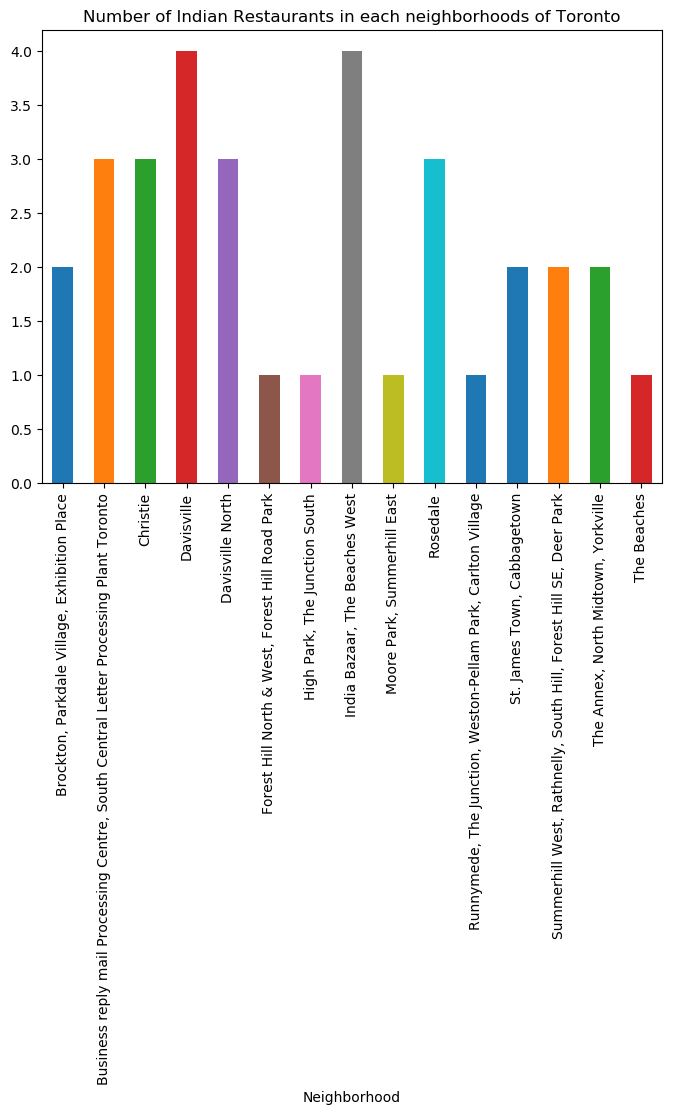

In [42]:
plt.figure(figsize=(8,6),dpi=100)
indian_rest_ny.groupby('Neighborhood')['ID'].count().plot(kind='bar')
plt.title('Number of Indian Restaurants in each neighborhoods of Toronto')

In [94]:
indian_rest_ny.groupby('Neighborhood')['ID'].count().nsmallest(9)

Neighborhood
Forest Hill North & West, Forest Hill Road Park                      1
High Park, The Junction South                                        1
Moore Park, Summerhill East                                          1
Runnymede, The Junction, Weston-Pellam Park, Carlton Village         1
The Beaches                                                          1
Brockton, Parkdale Village, Exhibition Place                         2
St. James Town, Cabbagetown                                          2
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park    2
The Annex, North Midtown, Yorkville                                  2
Name: ID, dtype: int64

In [43]:
indian_rest_ny_Davi=indian_rest_ny[indian_rest_ny['Neighborhood']=='Davisville']
indian_rest_ny_Davi

Borough Neighborhood                        ID  \
18  Central Toronto   Davisville  5169d445e4b07de190b5c3d6   
19  Central Toronto   Davisville  4b75c28af964a520ba222ee3   
20  Central Toronto   Davisville  4c51e0069d642d7f4aef50de   
21  Central Toronto   Davisville  5650eed9498e376aac0c2478   

                      Name  
18  Marigold Indian Bistro  
19               Kamasutra  
20     Eat Indian By Amaya  
21  Indian Street Food Co.

In [44]:
indian_rest_ny_Bazar=indian_rest_ny[indian_rest_ny['Neighborhood']=='India Bazaar, The Beaches West']
indian_rest_ny_Bazar

Borough                    Neighborhood                        ID  \
6  East Toronto  India Bazaar, The Beaches West  4ae0c7a8f964a520638221e3   
7  East Toronto  India Bazaar, The Beaches West  4afc9816f964a520312422e3   
8  East Toronto  India Bazaar, The Beaches West  4bac30a2f964a52018ea3ae3   
9  East Toronto  India Bazaar, The Beaches West  4d8d278a1d06b1f712942a3b   

               Name  
6      Udupi Palace  
7         Motimahal  
8  Bombay Chowpatty  
9           Gautama

**From the above diagram we can see that Davisville and India Bazaar, The Beaches West both neighbourhoods have 4 indian restaurants**

**Function the get all the details of any venue**

In [49]:
def get_venue_details(venue_id):
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [76]:
column_name=['Borough','Neighborhood','ID','Name','Likes','Rating','Tips']
indian_rest_details_davi=pd.DataFrame(columns=column_name)
for row in indian_rest_ny_Davi.values.tolist():
    Borough,Neighborhood,id,name=row
    venue_details=get_venue_details(id)
    indian_restaurants=venue_details
    for val in indian_restaurants.values.tolist():
        print(val)
        id,name,likes,rating,tips=val
        print('values are Borough: {}, Neighborhood: {}, ID: {}, Name: {}, Likes: {}, Rating: {}, Tips: {}'.format(Borough,Neighborhood,id,name,likes,rating,tips))
        indian_rest_details_davi = indian_rest_details_davi.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes':likes,
                                                'Rating': rating,
                                                'Tips':tips
                                               }, ignore_index=True)

['5169d445e4b07de190b5c3d6', 'Marigold Indian Bistro', 11, 8.0, 11]
values are Borough: Central Toronto, Neighborhood: Davisville, ID: 5169d445e4b07de190b5c3d6, Name: Marigold Indian Bistro, Likes: 11, Rating: 8.0, Tips: 11
['4b75c28af964a520ba222ee3', 'Kamasutra', 18, 8.1, 12]
values are Borough: Central Toronto, Neighborhood: Davisville, ID: 4b75c28af964a520ba222ee3, Name: Kamasutra, Likes: 18, Rating: 8.1, Tips: 12
['4c51e0069d642d7f4aef50de', 'Eat Indian By Amaya', 7, 7.1, 7]
values are Borough: Central Toronto, Neighborhood: Davisville, ID: 4c51e0069d642d7f4aef50de, Name: Eat Indian By Amaya, Likes: 7, Rating: 7.1, Tips: 7
['5650eed9498e376aac0c2478', 'Indian Street Food Co.', 9, 6.8, 3]
values are Borough: Central Toronto, Neighborhood: Davisville, ID: 5650eed9498e376aac0c2478, Name: Indian Street Food Co., Likes: 9, Rating: 6.8, Tips: 3


In [77]:
indian_rest_details_davi

Borough Neighborhood                        ID  \
0  Central Toronto   Davisville  5169d445e4b07de190b5c3d6   
1  Central Toronto   Davisville  4b75c28af964a520ba222ee3   
2  Central Toronto   Davisville  4c51e0069d642d7f4aef50de   
3  Central Toronto   Davisville  5650eed9498e376aac0c2478   

                     Name Likes  Rating Tips  
0  Marigold Indian Bistro    11     8.0   11  
1               Kamasutra    18     8.1   12  
2     Eat Indian By Amaya     7     7.1    7  
3  Indian Street Food Co.     9     6.8    3

In [81]:
indian_res_list=indian_rest_details_davi.nlargest(4,'Rating')[['Name','Rating','Likes']]
indian_res_list

Name  Rating Likes
1               Kamasutra     8.1    18
0  Marigold Indian Bistro     8.0    11
2     Eat Indian By Amaya     7.1     7
3  Indian Street Food Co.     6.8     9

**So in Toronto City if you are in Davisville neighborhood area then you must "Kamasutra" restaurant for indian cousine which is having the higest rating and likes**

In [82]:
column_name=['Borough','Neighborhood','ID','Name','Likes','Rating','Tips']
indian_rest_details_bazar=pd.DataFrame(columns=column_name)
for row in indian_rest_ny_Bazar.values.tolist():
    Borough,Neighborhood,id,name=row
    venue_details=get_venue_details(id)
    indian_restaurants=venue_details
    for val in indian_restaurants.values.tolist():
        print(val)
        id,name,likes,rating,tips=val
        print('values are Borough: {}, Neighborhood: {}, ID: {}, Name: {}, Likes: {}, Rating: {}, Tips: {}'.format(Borough,Neighborhood,id,name,likes,rating,tips))
        indian_rest_details_bazar = indian_rest_details_bazar.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes':likes,
                                                'Rating': rating,
                                                'Tips':tips
                                               }, ignore_index=True)

['4ae0c7a8f964a520638221e3', 'Udupi Palace', 78, 8.3, 31]
values are Borough: East Toronto, Neighborhood: India Bazaar, The Beaches West, ID: 4ae0c7a8f964a520638221e3, Name: Udupi Palace, Likes: 78, Rating: 8.3, Tips: 31
['4afc9816f964a520312422e3', 'Motimahal', 23, 8.0, 14]
values are Borough: East Toronto, Neighborhood: India Bazaar, The Beaches West, ID: 4afc9816f964a520312422e3, Name: Motimahal, Likes: 23, Rating: 8.0, Tips: 14
['4bac30a2f964a52018ea3ae3', 'Bombay Chowpatty', 7, 7.1, 5]
values are Borough: East Toronto, Neighborhood: India Bazaar, The Beaches West, ID: 4bac30a2f964a52018ea3ae3, Name: Bombay Chowpatty, Likes: 7, Rating: 7.1, Tips: 5
['4d8d278a1d06b1f712942a3b', 'Gautama', 15, 5.8, 15]
values are Borough: East Toronto, Neighborhood: India Bazaar, The Beaches West, ID: 4d8d278a1d06b1f712942a3b, Name: Gautama, Likes: 15, Rating: 5.8, Tips: 15


In [83]:
indian_rest_details_bazar

Borough                    Neighborhood                        ID  \
0  East Toronto  India Bazaar, The Beaches West  4ae0c7a8f964a520638221e3   
1  East Toronto  India Bazaar, The Beaches West  4afc9816f964a520312422e3   
2  East Toronto  India Bazaar, The Beaches West  4bac30a2f964a52018ea3ae3   
3  East Toronto  India Bazaar, The Beaches West  4d8d278a1d06b1f712942a3b   

               Name Likes  Rating Tips  
0      Udupi Palace    78     8.3   31  
1         Motimahal    23     8.0   14  
2  Bombay Chowpatty     7     7.1    5  
3           Gautama    15     5.8   15

In [84]:
indian_res_list=indian_rest_details_bazar.nlargest(4,'Rating')[['Name','Rating','Likes']]
indian_res_list

Name  Rating Likes
0      Udupi Palace     8.3    78
1         Motimahal     8.0    23
2  Bombay Chowpatty     7.1     7
3           Gautama     5.8    15

**So in Toronto City if you are in India Bazaar, The Beaches West neighborhood area then you must "Udupi Palace" restaurant for indian cousine which is having the higest rating and likes**